<AxesSubplot:xlabel='Title', ylabel='Count'>

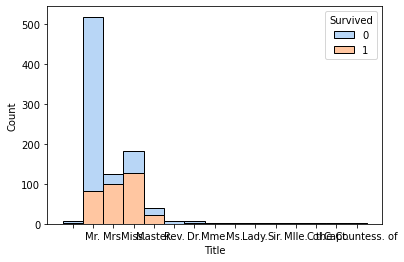

In [22]:

import pandas as pd
import matplotlib as plt
import seaborn as sns


def GenderUpdate(genderText):
    if (genderText == "male"):
        return 0
    return 1

def GetTitle(name):
  name = HumanName(name)
  return name['title']


titantic_data = pd.read_csv("sampledata/train.csv")
titantic_data['Gender'] = titantic_data['Sex'].apply(GenderUpdate)
titantic_data['Title'] = titantic_data['Name'].apply(GetTitle) 

# sns.pairplot(data=titantic_data, hue="Survived")
# sns.scatterplot(data=titantic_data, x='Pclass', y='Fare', hue='Survived')

sns.histplot(data=titantic_data, stat="count", multiple="stack",
              x="Title", kde=False,
             palette="pastel", hue="Survived",
              element="bars", legend=True)




In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from datetime import datetime
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
from nameparser import HumanName
from collections import Counter
import matplotlib.pyplot as plt
from ethnicolr import census_ln

from numpy import mean
from numpy import absolute
from numpy import sqrt
from numpy import arange
import numpy as np

import pandas as pd
import matplotlib as plt
import seaborn as sns


def GetFileOutPutName(prefix):
  #  return 'solution.csv'
  return 'Kaggle-Submission\\' + prefix + '-' + datetime.now().strftime("%Y%m%d-%I%M%S%p") + '.csv'

def GenderUpdate(genderText):
  if (genderText == "male"):
      return 0
  return 1    

def PortOfEmbarkment(port):
  if (port == "S"):
    return 1
  elif (port == "C"):
    return 2
  elif (port == "Q"):
    return 3
  return 0 

def EncodeTitle(title):
  if (title == "Mr."):
    return 1
  elif (title == "Miss."):
    return 2
  elif (title == "Mrs."):
    return 3
  elif (title == "Master."):
    return 4
  elif (title == "Dr."):
    return 5
  elif (title == "Rev."):
    return 6
  elif (title == "Mile."):
    return 7
  elif (title == "Col."):
    return 8
  elif (title == "Ms."):
    return 9
  elif (title == "the Contess. of"):
    return 10
  elif (title == "Capt."):
    return 11
  elif (title == "Lady."):
    return 12
  elif (title == "Mme."):
    return 13
  elif (title == "Sir."):
    return 14
  return 0 

def GetLastName(name):
  name = HumanName(name)
  return name['last']

def GetFirstName(name):
  name = HumanName(name)
  return name['first']

def GetTitle(name):
  name = HumanName(name)
  return name['title']

scaler = StandardScaler()

titantic_test = pd.read_csv('sampledata/test.csv')
titantic_train = pd.read_csv('sampledata/train.csv')

titantic_test['Gender']  = titantic_test['Sex'].apply(GenderUpdate)
titantic_train['Gender'] = titantic_train['Sex'].apply(GenderUpdate)

titantic_test['Port']  = titantic_test['Embarked'].apply(PortOfEmbarkment)
titantic_train['Port'] = titantic_train['Embarked'].apply(PortOfEmbarkment)

titantic_test['Title'] = titantic_test['Name'].apply(GetTitle) 
titantic_train['Title'] = titantic_train['Name'].apply(GetTitle) 

titantic_test['First'] = titantic_test['Name'].apply(GetFirstName) 
titantic_train['First'] = titantic_train['Name'].apply(GetFirstName) 

titantic_test['Last'] = titantic_test['Name'].apply(GetLastName) 
titantic_train['Last'] = titantic_train['Name'].apply(GetLastName) 

titantic_test['EncodeTitle'] = titantic_test['Title'].apply(EncodeTitle) 
titantic_train['EncodeTitle'] = titantic_train['Title'].apply(EncodeTitle) 

titantic_test['Age'] = titantic_test['Age'].fillna(titantic_test['Age'].median())
titantic_train['Age'] = titantic_train['Age'].fillna(titantic_train['Age'].median())

titantic_test[["AgeScaled"]] = scaler.fit_transform(titantic_test[["Age"]])
titantic_train[["AgeScaled"]] = scaler.fit_transform(titantic_train[["Age"]])

titantic_test['Fare'] = titantic_test['Fare'].fillna(titantic_test['Fare'].median())
titantic_train['Fare'] = titantic_train['Fare'].fillna(titantic_train['Fare'].median())

X = titantic_train[['PassengerId','Pclass','Gender','Age','SibSp','Parch','Fare','Port','EncodeTitle']]
y = titantic_train['Survived']
Q = titantic_test[['PassengerId','Pclass','Gender','Age','SibSp','Parch','Fare','Port','EncodeTitle']]

titantic_test  = census_ln(titantic_test, 'Last', year=2000)
titantic_train = census_ln(titantic_train, 'Last', year=2000)

titantic_test['pctwhite'] = titantic_test['pctwhite'].fillna(0) 
titantic_test['pctwhitef'] = titantic_test['pctwhite'].astype(float).round(2)

titantic_test['pctblack'] = titantic_test['pctblack'].fillna(0) 
titantic_test['pctblack'].replace('(S)','0',inplace=True)
titantic_test['pctblackf'] = titantic_test['pctblack'].astype(float).round(2)

titantic_test['pctapi'] = titantic_test['pctapi'].fillna(0) 
titantic_test['pctapi'].replace('(S)','0',inplace=True)
titantic_test['pctapif'] = titantic_test['pctapi'].astype(float).round(2)

titantic_test['pctaian'] = titantic_test['pctaian'].fillna(0) 
titantic_test['pctaian'].replace('(S)','0',inplace=True)
titantic_test['pctaianf'] = titantic_test['pctaian'].astype(float).round(2)

titantic_test['pct2prace'] = titantic_test['pct2prace'].fillna(0) 
titantic_test['pct2prace'].replace('(S)','0',inplace=True)
titantic_test['pct2pracef'] = titantic_test['pct2prace'].astype(float).round(2)

titantic_test['pcthispanic'] = titantic_test['pcthispanic'].fillna(0) 
titantic_test['pcthispanic'].replace('(S)','0',inplace=True)
titantic_test['pcthispanicf'] = titantic_test['pcthispanic'].astype(float).round(2)

titantic_train['pctwhite'] = titantic_train['pctwhite'].fillna(0) 
titantic_train['pctwhitef'] = titantic_train['pctwhite'].astype(float).round(2)

titantic_train['pctblack'] = titantic_train['pctblack'].fillna(0) 
titantic_train['pctblack'].replace('(S)','0',inplace=True)
titantic_train['pctblackf'] = titantic_train['pctblack'].astype(float).round(2)

titantic_train['pctapi'] = titantic_train['pctapi'].fillna(0)
titantic_train['pctapi'].replace('(S)','0',inplace=True)
titantic_train['pctapif'] = titantic_train['pctapi'].astype(float).round(2)

titantic_train['pctaian'] = titantic_train['pctaian'].fillna(0)
titantic_train['pctaian'].replace('(S)','0',inplace=True)
titantic_train['pctaianf'] = titantic_train['pctaian'].astype(float).round(2)

titantic_train['pct2prace'] = titantic_train['pct2prace'].fillna(0) 
titantic_train['pct2prace'].replace('(S)','0',inplace=True)
titantic_train['pct2pracef'] = titantic_train['pct2prace'].astype(float).round(2)

titantic_train['pcthispanic'] = titantic_train['pcthispanic'].fillna(0)
titantic_train['pcthispanic'].replace('(S)','0',inplace=True) 
titantic_train['pcthispanicf'] = titantic_train['pcthispanic'].astype(float).round(2)

X = titantic_train[['PassengerId','Pclass','Gender','Age','Parch','Fare','Port','EncodeTitle','pctwhite','pctblack','pctapi','pctaian','pct2prace','pcthispanic']]
y = titantic_train['Survived']
Q = titantic_test[['PassengerId','Pclass','Gender','Age','Parch','Fare','Port','EncodeTitle','pctwhite','pctblack','pctapi','pctaian','pct2prace','pcthispanic']]

filename = GetFileOutPutName("Training")
titantic_train.to_csv(filename, index=False)

titantic_train.Survived.value_counts()
titantic_train.Title.value_counts()

# classifierType = "ExtraTreesClassifier"
classifierType = "RandomForestRegressor"
# classifierType = "GradientBoostingClassifier"

filename = GetFileOutPutName(classifierType)

if (classifierType == "RandomForestRegressor"):
  regr = RandomForestRegressor(n_estimators=32, max_depth=3, random_state=0)
  regr.fit(X, y)
  predictions = regr.predict(Q).round(decimals=0).astype(int)
  score = regr.score(X,y)
elif(classifierType == "GradientBoostingClassifier"):
  regr = GradientBoostingClassifier(n_estimators=32, learning_rate=1.0, max_depth=3, random_state=0).fit(X, y)
  regr.fit(X,y)
  predictions = regr.predict(Q)
  score = regr.score(X, y)
elif(classifierType == "ExtraTreesClassifier"):
  regr = ExtraTreesClassifier(n_estimators=32, random_state=0)
  regr.fit(X,y)
  predictions = regr.predict(Q)
  score = regr.score(X, y)

print("Score = ")
print(score)

# use the following code to tune hyperpareters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import roc_curve, auc

y_pred = regr.predict(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print("roc_auc = ")
print(roc_auc)

learning_rates = [1, 32, 300, 400, 1000]
train_results = []
test_results = []
for estimator in learning_rates:
   model = ExtraTreesClassifier(n_estimators=estimator, max_depth=3)
   model.fit(X_train, y_train)

   train_pred = model.predict(X_train)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)

   y_pred = model.predict(X_test)

   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


# predictors = [x for x in titantic_train.columns if x not in ['Survived']]
# param_test1 = {'n_estimators':range(20,81,10)}
# gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
# param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)
# gsearch1.fit(titantic_train[X_train],titantic_train[y_train])

newFrame = pd.DataFrame(titantic_test['PassengerId'])
newFrame['Survived'] = predictions.tolist()
newFrame['Pclass'] = titantic_test['Pclass']
newFrame['Gender'] = titantic_test['Gender']
newFrame['Age'] = titantic_test['Age']
newFrame['Port'] = titantic_test['Port']
newFrame['Name'] = titantic_test['Name']
newFrame['Title'] = titantic_test['Title']
newFrame['Ticket'] = titantic_test['Ticket']

# deadFirstClassWomen = [1004,1006]
# for i in deadFirstClassWomen:
#  mask = (newFrame['PassengerId'] == i) 
#  newFrame['Survived'][mask] = 0

ticket1661workedtogether = [931]
for i in ticket1661workedtogether:
  mask = (newFrame['PassengerId'] == i) 
  newFrame['Survived'][mask] = 1

# guys in one ticket worked together to save themselves
mask = ((newFrame['Ticket'] == '1661') )
newFrame['Survived'][mask] = 1

filename = GetFileOutPutName(classifierType)
newFrame.to_csv(filename, index=False)

newFrame.drop(['Pclass','Gender','Age','Port','Name','Title','Ticket'], axis=1, inplace = True )
filename = GetFileOutPutName(classifierType + '-Submit')

newFrame.to_csv(filename, index=False)

# titantic_train.Survived.value_counts()
newFrame.Survived.value_counts()


class Node: 
    """
    Class for creating the nodes for a decision tree 
    """
    def __init__(
        self, 
        Y: list,
        X: pd.DataFrame,
        min_samples_split=None,
        max_depth=None,
        depth=None,
        node_type=None,
        rule=None
    ):
        # Saving the data to the node 
        self.Y = Y 
        self.X = X

        # Saving the hyper parameters
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 5

        # Default current depth of node 
        self.depth = depth if depth else 0

        # Extracting all the features
        self.features = list(self.X.columns)

        # Type of node 
        self.node_type = node_type if node_type else 'root'

        # Rule for spliting 
        self.rule = rule if rule else ""

        # Calculating the counts of Y in the node 
        self.counts = Counter(Y)

        # Getting the GINI impurity based on the Y distribution
        self.gini_impurity = self.get_GINI()

        # Sorting the counts and saving the final prediction of the node 
        counts_sorted = list(sorted(self.counts.items(), key=lambda item: item[1]))

        # Getting the last item
        yhat = None
        if len(counts_sorted) > 0:
            yhat = counts_sorted[-1][0]

        # Saving to object attribute. This node will predict the class with the most frequent class
        self.yhat = yhat 

        # Saving the number of observations in the node 
        self.n = len(Y)

        # Initiating the left and right nodes as empty nodes
        self.left = None 
        self.right = None 

        # Default values for splits
        self.best_feature = None 
        self.best_value = None 

    @staticmethod
    def GINI_impurity(y1_count: int, y2_count: int) -> float:
        """
        Given the observations of a binary class calculate the GINI impurity
        """
        # Ensuring the correct types
        if y1_count is None:
            y1_count = 0

        if y2_count is None:
            y2_count = 0

        # Getting the total observations
        n = y1_count + y2_count
        
        # If n is 0 then we return the lowest possible gini impurity
        if n == 0:
            return 0.0

        # Getting the probability to see each of the classes
        p1 = y1_count / n
        p2 = y2_count / n
        
        # Calculating GINI 
        gini = 1 - (p1 ** 2 + p2 ** 2)
        
        # Returning the gini impurity
        return gini

    @staticmethod
    def ma(x: np.array, window: int) -> np.array:
        """
        Calculates the moving average of the given list. 
        """
        return np.convolve(x, np.ones(window), 'valid') / window

    def get_GINI(self):
        """
        Function to calculate the GINI impurity of a node 
        """
        # Getting the 0 and 1 counts
        y1_count, y2_count = self.counts.get(0, 0), self.counts.get(1, 0)

        # Getting the GINI impurity
        return self.GINI_impurity(y1_count, y2_count)

    def best_split(self) -> tuple:
        """
        Given the X features and Y targets calculates the best split 
        for a decision tree
        """
        # Creating a dataset for spliting
        df = self.X.copy()
        df['Y'] = self.Y

        # Getting the GINI impurity for the base input 
        GINI_base = self.get_GINI()

        # Finding which split yields the best GINI gain 
        max_gain = 0

        # Default best feature and split
        best_feature = None
        best_value = None

        for feature in self.features:
            # Droping missing values
            Xdf = df.dropna().sort_values(feature)

            # Sorting the values and getting the rolling average
            xmeans = self.ma(Xdf[feature].unique(), 2)

            for value in xmeans:
                # Spliting the dataset 
                left_counts = Counter(Xdf[Xdf[feature]<value]['Y'])
                right_counts = Counter(Xdf[Xdf[feature]>=value]['Y'])

                # Getting the Y distribution from the dicts
                y0_left, y1_left, y0_right, y1_right = left_counts.get(0, 0), left_counts.get(1, 0), right_counts.get(0, 0), right_counts.get(1, 0)

                # Getting the left and right gini impurities
                gini_left = self.GINI_impurity(y0_left, y1_left)
                gini_right = self.GINI_impurity(y0_right, y1_right)

                # Getting the obs count from the left and the right data splits
                n_left = y0_left + y1_left
                n_right = y0_right + y1_right

                # Calculating the weights for each of the nodes
                w_left = n_left / (n_left + n_right)
                w_right = n_right / (n_left + n_right)

                # Calculating the weighted GINI impurity
                wGINI = w_left * gini_left + w_right * gini_right

                # Calculating the GINI gain 
                GINIgain = GINI_base - wGINI

                # Checking if this is the best split so far 
                if GINIgain > max_gain:
                    best_feature = feature
                    best_value = value 

                    # Setting the best gain to the current one 
                    max_gain = GINIgain

        return (best_feature, best_value)

    def grow_tree(self):
        """
        Recursive method to create the decision tree
        """
        # Making a df from the data 
        df = self.X.copy()
        df['Y'] = self.Y

        # If there is GINI to be gained, we split further 
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):

            # Getting the best split 
            best_feature, best_value = self.best_split()

            if best_feature is not None:
                # Saving the best split to the current node 
                self.best_feature = best_feature
                self.best_value = best_value

                # Getting the left and right nodes
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()

                # Creating the left and right nodes
                left = Node(
                    left_df['Y'].values.tolist(), 
                    left_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split, 
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )

                self.left = left 
                self.left.grow_tree()

                right = Node(
                    right_df['Y'].values.tolist(), 
                    right_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )

                self.right = right
                self.right.grow_tree()

    def print_info(self, width=4):
        """
        Method to print the infromation about the tree
        """
        # Defining the number of spaces 
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const
        
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | GINI impurity of the node: {round(self.gini_impurity, 2)}")
        print(f"{' ' * const}   | Class distribution in the node: {dict(self.counts)}")
        print(f"{' ' * const}   | Predicted class: {self.yhat}")   

    def print_tree(self):
        """
        Prints the whole tree from the current node to the bottom
        """
        self.print_info() 
        
        if self.left is not None: 
            self.left.print_tree()
        
        if self.right is not None:
            self.right.print_tree()

    def predict(self, X:pd.DataFrame):
        """
        Batch prediction method
        """
        predictions = []

        for _, x in X.iterrows():
            values = {}
            for feature in self.features:
                values.update({feature: x[feature]})
        
            predictions.append(self.predict_obs(values))
        
        return predictions

    def predict_obs(self, values: dict) -> int:
        """
        Method to predict the class given a set of features
        """
        cur_node = self
        while cur_node.depth < cur_node.max_depth:
            # Traversing the nodes all the way to the bottom
            best_feature = cur_node.best_feature
            best_value = cur_node.best_value

            if cur_node.n < cur_node.min_samples_split:
                break 

            if (values.get(best_feature) < best_value):
                if self.left is not None:
                    cur_node = cur_node.left
            else:
                if self.right is not None:
                    cur_node = cur_node.right
            
        return cur_node.yhat


# the following section uses the node purity code listed above to attempt to create a decision tree based on the
# existing data.

hp = {
 "max_depth": 5,
 "min_samples_split": 50
}

# X = titantic_train[['PassengerId','Pclass','Gender','Age','Parch','Fare','Port','EncodeTitle']]
# y = titantic_train['Survived']
# Q = titantic_test[['PassengerId','Pclass','Gender','Age','Parch','Fare','Port','EncodeTitle']]

X = titantic_train[['PassengerId','Pclass','Gender','Age','Parch','Fare','Port','EncodeTitle','pctwhitef','pctblackf','pctapif','pctaianf','pct2pracef','pcthispanicf']]
y = titantic_train['Survived']
Q = titantic_test[['PassengerId','Pclass','Gender','Age','Parch','Fare','Port','EncodeTitle','pctwhitef','pctblackf','pctapif','pctaianf','pct2pracef','pcthispanicf']]

root = Node(y, X, **hp)

root.grow_tree()

predictions = root.predict(Q)

root.print_tree()

newFrame2 = pd.DataFrame(titantic_test['PassengerId'])
newFrame2['Survived'] = predictions

filename = GetFileOutPutName("PredictTree")
newFrame2.to_csv(filename, index=False)



Score = 
0.49823612356620606
roc_auc = 
0.9124839124839126


<ipython-input-17-7d94e131b08d>:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newFrame['Survived'][mask] = 1
<ipython-input-17-7d94e131b08d>:280: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newFrame['Survived'][mask] = 1


Root
   | GINI impurity of the node: 0.47
   | Class distribution in the node: {0: 549, 1: 342}
   | Predicted class: 0
|-------- Split rule: EncodeTitle <= 1.5
           | GINI impurity of the node: 0.27
           | Class distribution in the node: {0: 439, 1: 85}
           | Predicted class: 0
|---------------- Split rule: Fare <= 26.269
                   | GINI impurity of the node: 0.18
                   | Class distribution in the node: {0: 352, 1: 39}
                   | Predicted class: 0
|------------------------ Split rule: PassengerId <= 581.5
                           | GINI impurity of the node: 0.22
                           | Class distribution in the node: {0: 212, 1: 31}
                           | Predicted class: 0
|-------------------------------- Split rule: PassengerId <= 569.5
                                   | GINI impurity of the node: 0.21
                                   | Class distribution in the node: {0: 210, 1: 28}
                            

[Text(0.5, 1.0, 'Male Deaths for Hispanic Names by Age')]

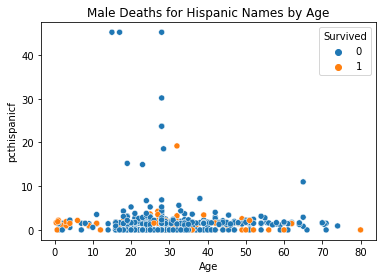

In [30]:
t = titantic_train[(titantic_train["Gender"] == 0)]

sns.scatterplot(data=t, x='Age', y='pcthispanicf', hue='Survived').set(title="Male Deaths for Hispanic Names by Age")


[Text(0.5, 1.0, 'Male Deaths for Black Names by Age')]

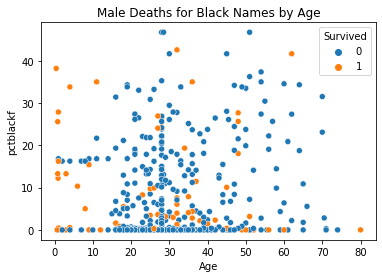

In [32]:

sns.scatterplot(data=t, x='Age', y='pctblackf', hue='Survived').set(title="Male Deaths for Black Names by Age")

[Text(0.5, 1.0, 'Male Deaths for Asia Pacific Islander by Age')]

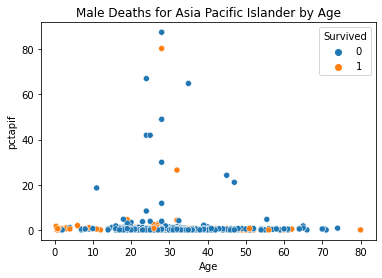

In [33]:
sns.scatterplot(data=t, x='Age', y='pctapif', hue='Survived').set(title="Male Deaths for Asia Pacific Islander by Age")

<AxesSubplot:xlabel='Age', ylabel='pctaianf'>

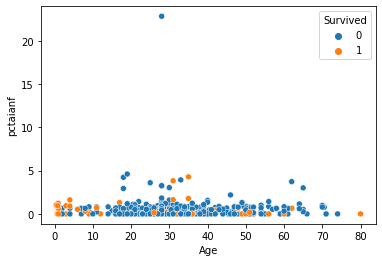

In [25]:
sns.scatterplot(data=t, x='Age', y='pctaianf', hue='Survived')

[Text(0.5, 1.0, 'Male Deaths for 2 Races by Age')]

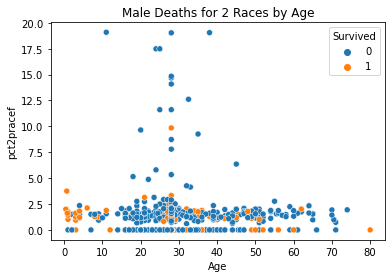

In [34]:
sns.scatterplot(data=t, x='Age', y='pct2pracef', hue='Survived').set(title="Male Deaths for 2 Races by Age")

[Text(0.5, 1.0, 'Male Deaths for White Race by Age')]

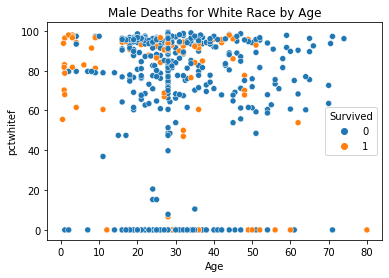

In [35]:
sns.scatterplot(data=t, x='Age', y='pctwhitef', hue='Survived').set(title="Male Deaths for White Race by Age")